# Multiple Linear Regression
## Shared Bikes Demand Prediction - Assignment Solution

#### Problem Statement:

BoomBikes, a US bike-sharing provider, has experienced a significant drop in revenue due to the COVID-19 pandemic. To address this issue and prepare for the post-lockdown economic recovery, they are devising a strategic plan. The company aims to assess the future demand for shared bikes after the pandemic ends, positioning themselves for success in a competitive market.

To achieve this, BoomBikes has engaged a consulting company to analyze the factors influencing the demand for shared bikes in the American market. They have specific objectives:

Identify the significant variables that predict shared bike demand.
Assess the effectiveness of these variables in describing bike demand.
BoomBikes has collected a substantial dataset, incorporating data from meteorological surveys and people's lifestyles, to understand daily bike demand patterns across the American market. By doing so, they aim to differentiate their services from competitors and maximize profits when economic conditions improve.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration
first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_bikes=pd.read_csv("day.csv")
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Let's look at the number of rows and columns in the dataset
df_bikes.shape

(730, 16)

In [5]:
# Getting insights of the features
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(df_bikes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [7]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df_bikes=df_bikes.drop(['instant','dteday'], axis = 1, inplace = False)
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

<b>Categorizing columns</b>

    mnth       : Categorizing into month January to December
    season     : Ctegorizing into four levels (Spring, Summer, Fall, Winter)
    weathersit : Categorizing into four levels (Clear, Mist, Light Snow and Heavy Rain)
    weekday    : Categorizing into Sun, Mon, Tue, Wed, Thu, Fri, Sat

In [8]:
df_bikes['weathersit'] = df_bikes.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
df_bikes['season'] = df_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bikes['mnth']=df_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_bikes['weekday']=df_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [9]:
# Get the dummy variables for the feature 'weathersit'
status = pd.get_dummies(df_bikes['weathersit'])

# Check what the dataset 'status' looks like
status.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [10]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['weathersit'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [11]:
# Get the dummy variables for the feature 'season'
status = pd.get_dummies(df_bikes['season'], drop_first = True)
# Check what the dataset 'status' looks like
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['season'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Snow,Mist,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [13]:
# Get the dummy variables for the feature 'weekday'
status = pd.get_dummies(df_bikes['weekday'])

# Check what the dataset 'status' looks like
status.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [14]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['weekday'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mist,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,1,1,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,1,1,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,1,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,1,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,1


In [15]:
# Get the dummy variables for the feature 'mnth'
status = pd.get_dummies(df_bikes['mnth'])

# Check what the dataset 'status' looks like
status.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['mnth'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


<b>Visualizing the Data</b>

In [17]:
df_bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thu,1,Mist,10.420847,11.33210,65.2917,...,1,0,0,0,0,0,0,0,0,0
726,spring,1,Dec,0,Fri,1,Mist,10.386653,12.75230,59.0000,...,1,0,0,0,0,0,0,0,0,0
727,spring,1,Dec,0,Sat,0,Mist,10.386653,12.12000,75.2917,...,1,0,0,0,0,0,0,0,0,0
728,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,...,1,0,0,0,0,0,0,0,0,0


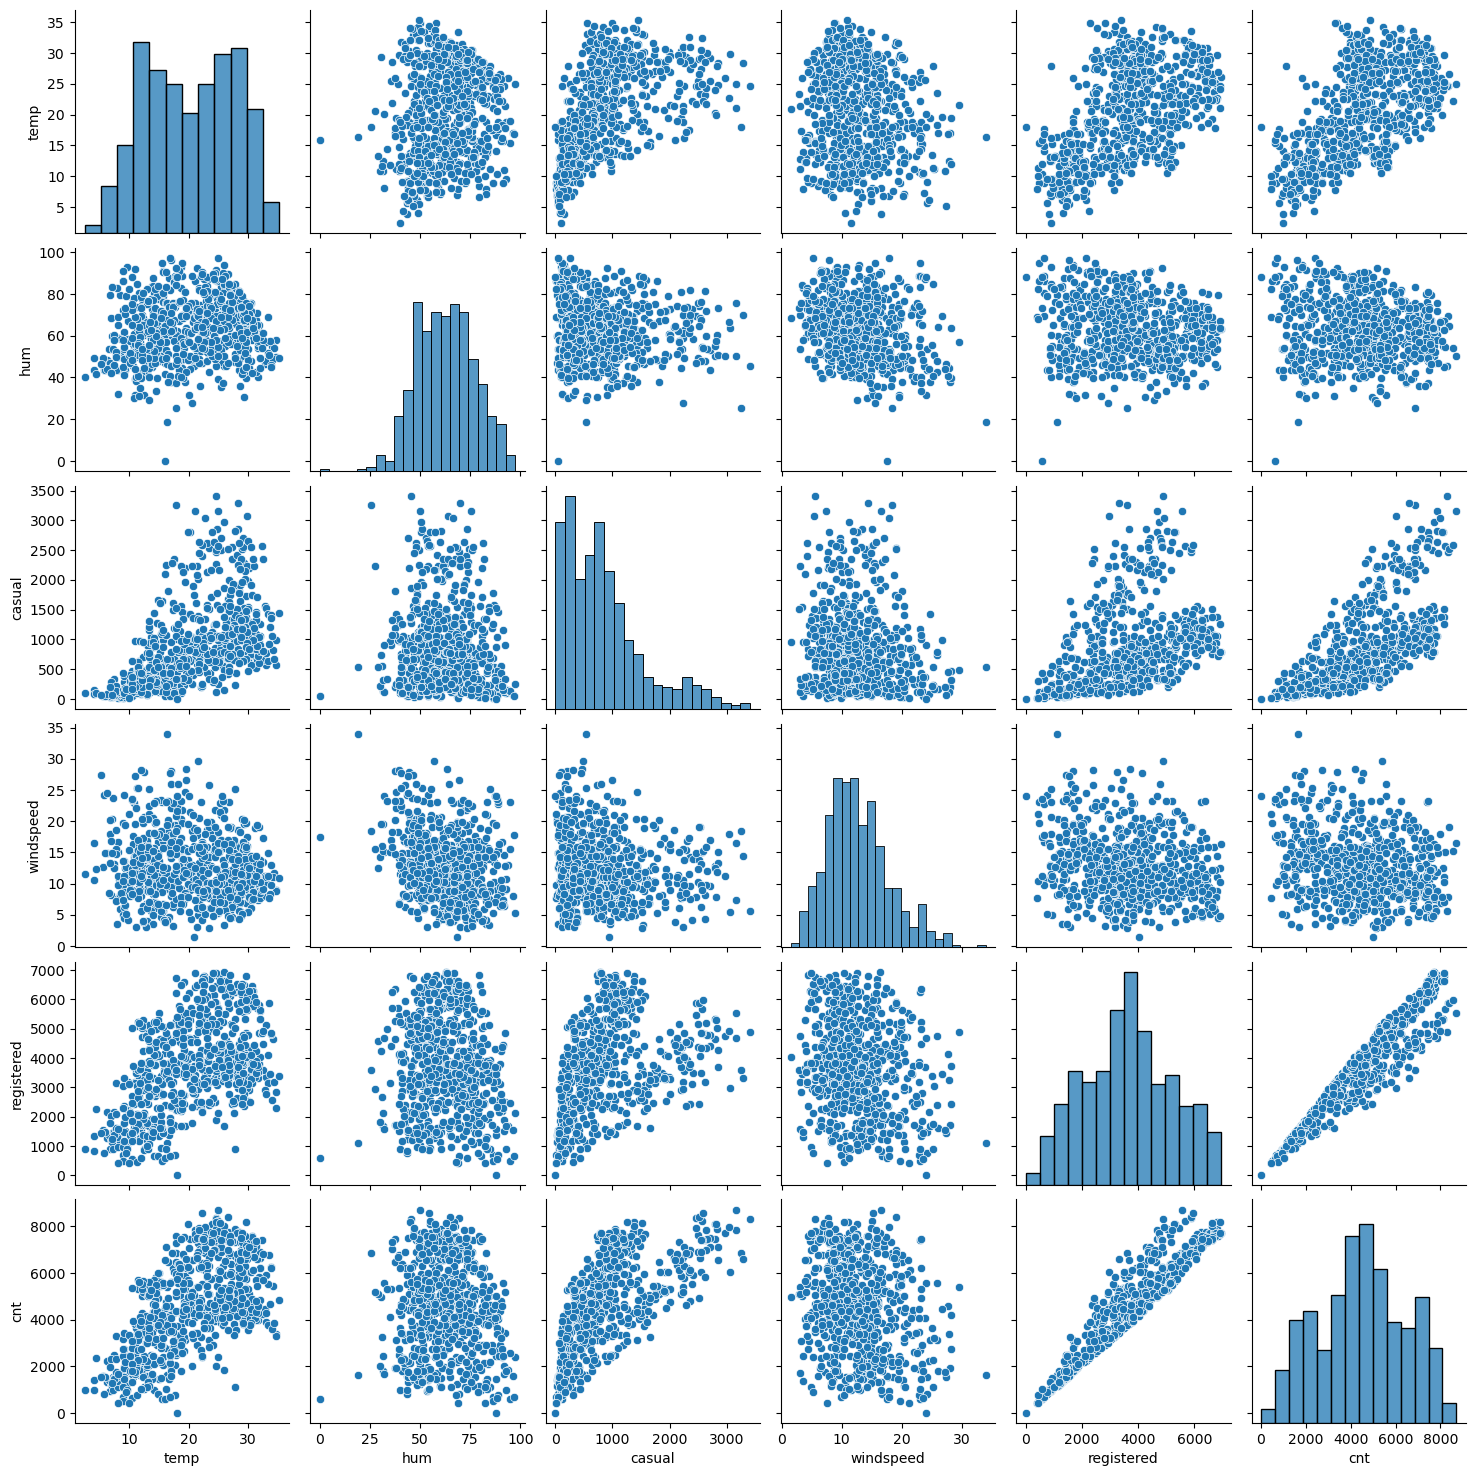

In [18]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df_bikes, vars=["temp", "hum",'casual','windspeed','registered','cnt'])
plt.show()

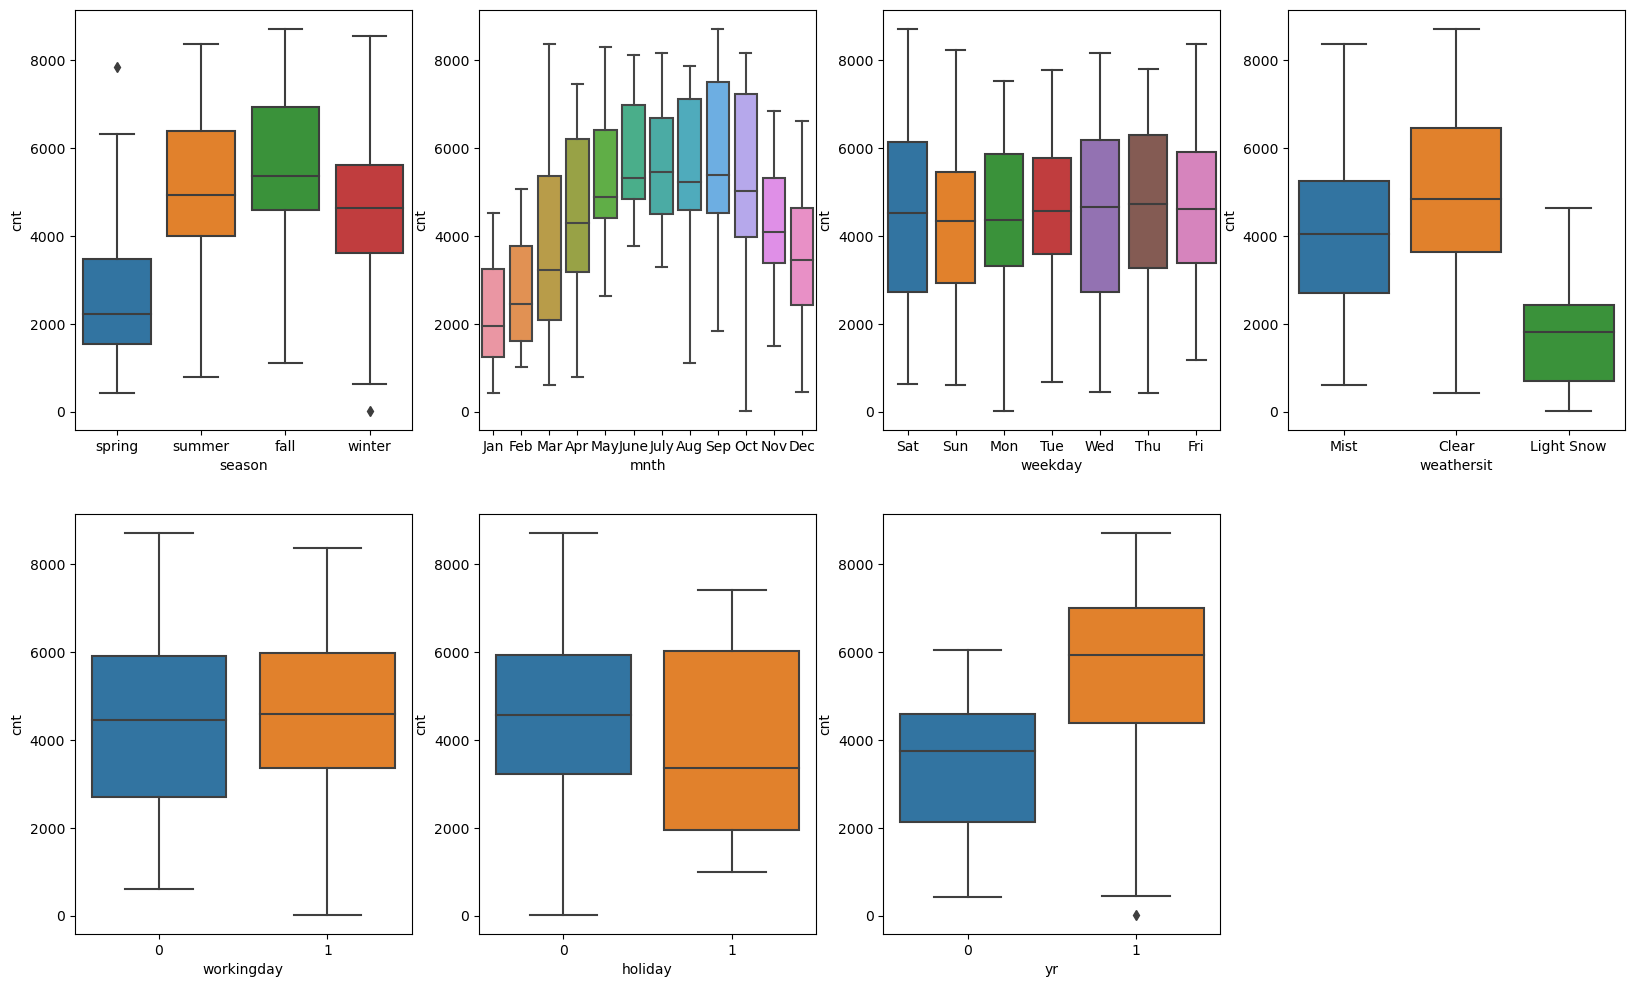

In [19]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df_bikes)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df_bikes)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_bikes)
plt.subplot(2, 4, 5)
sns.boxplot(x='workingday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 6)
sns.boxplot(x='holiday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=df_bikes)
plt.show()

<B> Findings: </B>

1. Demand is higher during Fall and Summar
2. June to October months registers higher demand
3. Clear weather postively impacts the demand of Bikes
4. People seems to prefer Bikes more during Holidays
5. Boom Bikes Business has significantly increased year on year and is higher in 2019 than 2018

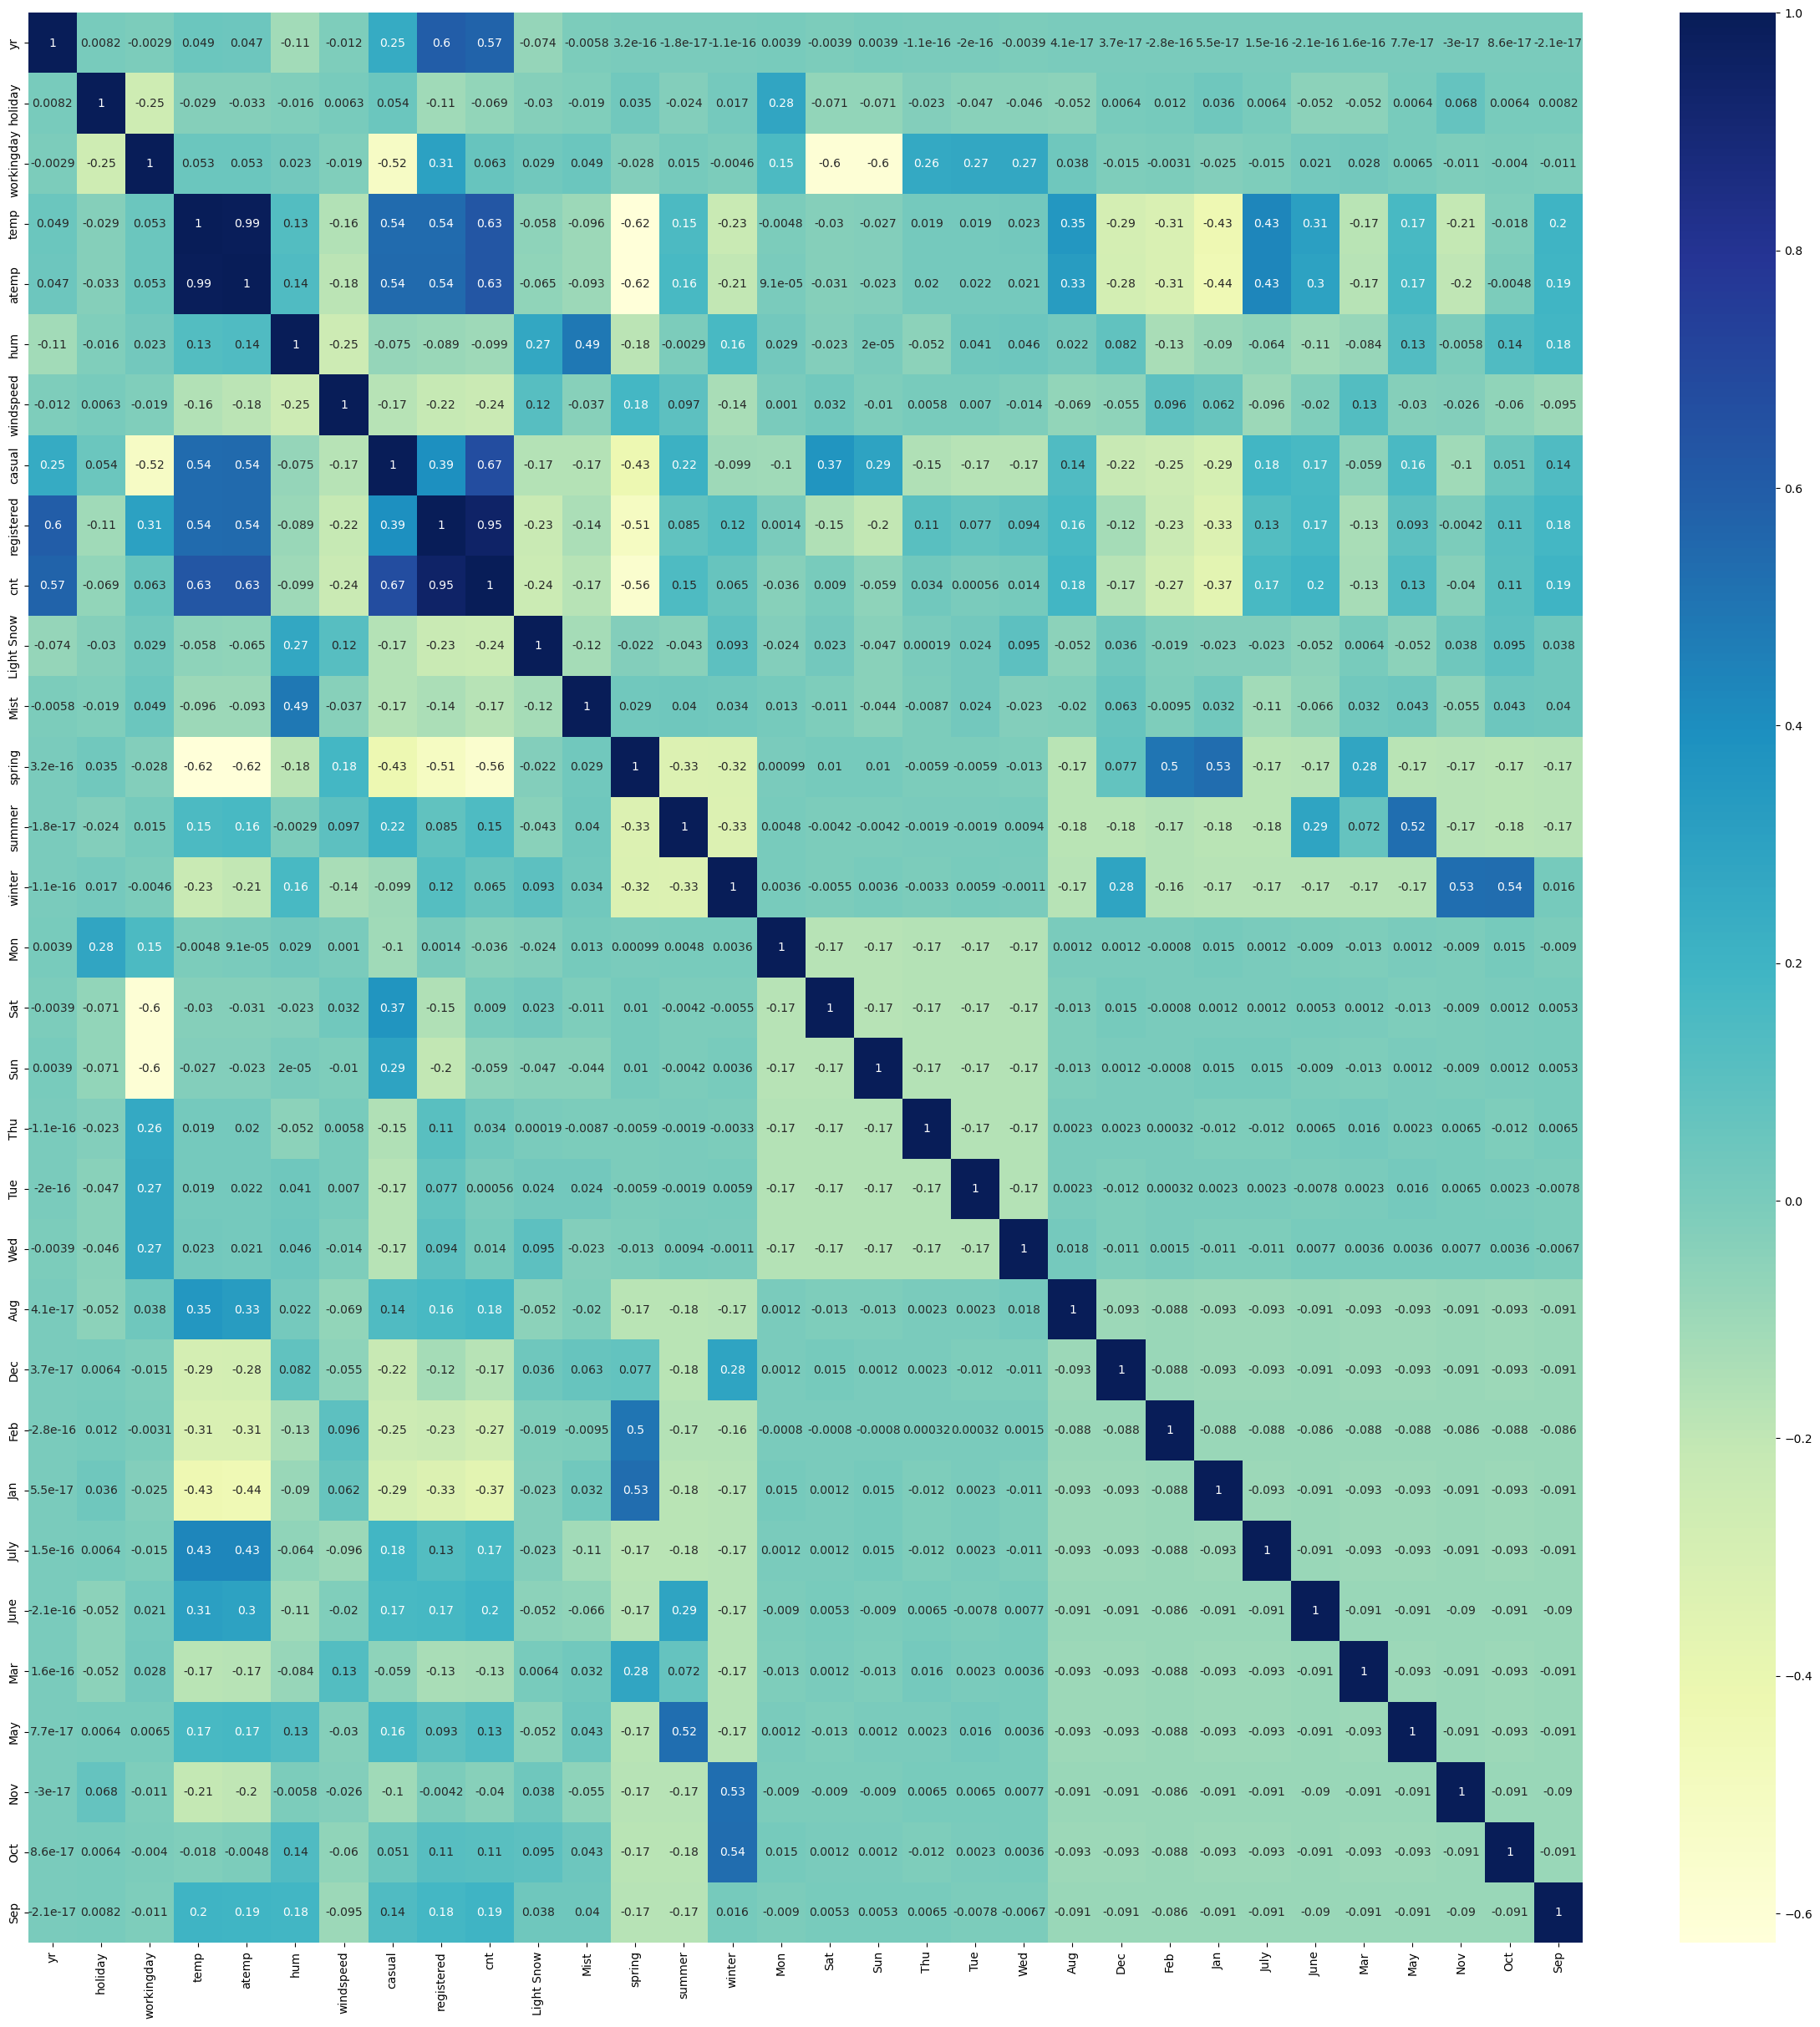

In [20]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

<B>Observations:</B>

    High correlation of temp and atemp variables which means one of them can be dropped
    Registered has a very high correlation with the Target Variable given that Target Variable is made up of Registered variable and hence can be dropped

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [21]:
# Drop 'weekday' as we have created the dummies for it
df_bikes.drop(['mnth'], axis = 1, inplace = True)
# Drop 'weathersit' as we have created the dummies for it
df_bikes.drop(['weathersit'], axis = 1, inplace = True)
# Drop 'weekday' as we have created the dummies for it
df_bikes.drop(['weekday'], axis = 1, inplace = True)
# Drop 'season' as we have created the dummies for it
df_bikes.drop(['season'], axis = 1, inplace = True)
# Drop 'atemp' as we have temp which has a direct correlation
df_bikes.drop(['atemp'], axis = 1, inplace = True)
# Drop 'Registered' as it seems from the Co-relation chart that it has the highest co-relation
df_bikes.drop(['registered'], axis = 1, inplace = True)
# Drop 'Casual' as it is already part of CNT our Target value
df_bikes.drop(['casual'], axis = 1, inplace = True)

df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df_bikes.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.028767,0.336986,0.246575,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.167266,0.473004,0.431313,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#checking for null values

df_bikes.isnull().sum()

yr            0
holiday       0
workingday    0
temp          0
hum           0
windspeed     0
cnt           0
Light Snow    0
Mist          0
spring        0
summer        0
winter        0
Mon           0
Sat           0
Sun           0
Thu           0
Tue           0
Wed           0
Aug           0
Dec           0
Feb           0
Jan           0
July          0
June          0
Mar           0
May           0
Nov           0
Oct           0
Sep           0
dtype: int64

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [24]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_bikes, train_size=0.7, test_size=0.3, random_state=100)

In [25]:
df_test_pred = df_test

In [26]:
df_test_pred.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,63.7917,5.459106,6043,0,1,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Light Snow', 'Mist', 'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [28]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,0,0,1,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,1,0,...,1,0,0,0,0,0,0,0,0,0


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [29]:
from sklearn.preprocessing import MinMaxScaler 

In [30]:
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [32]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


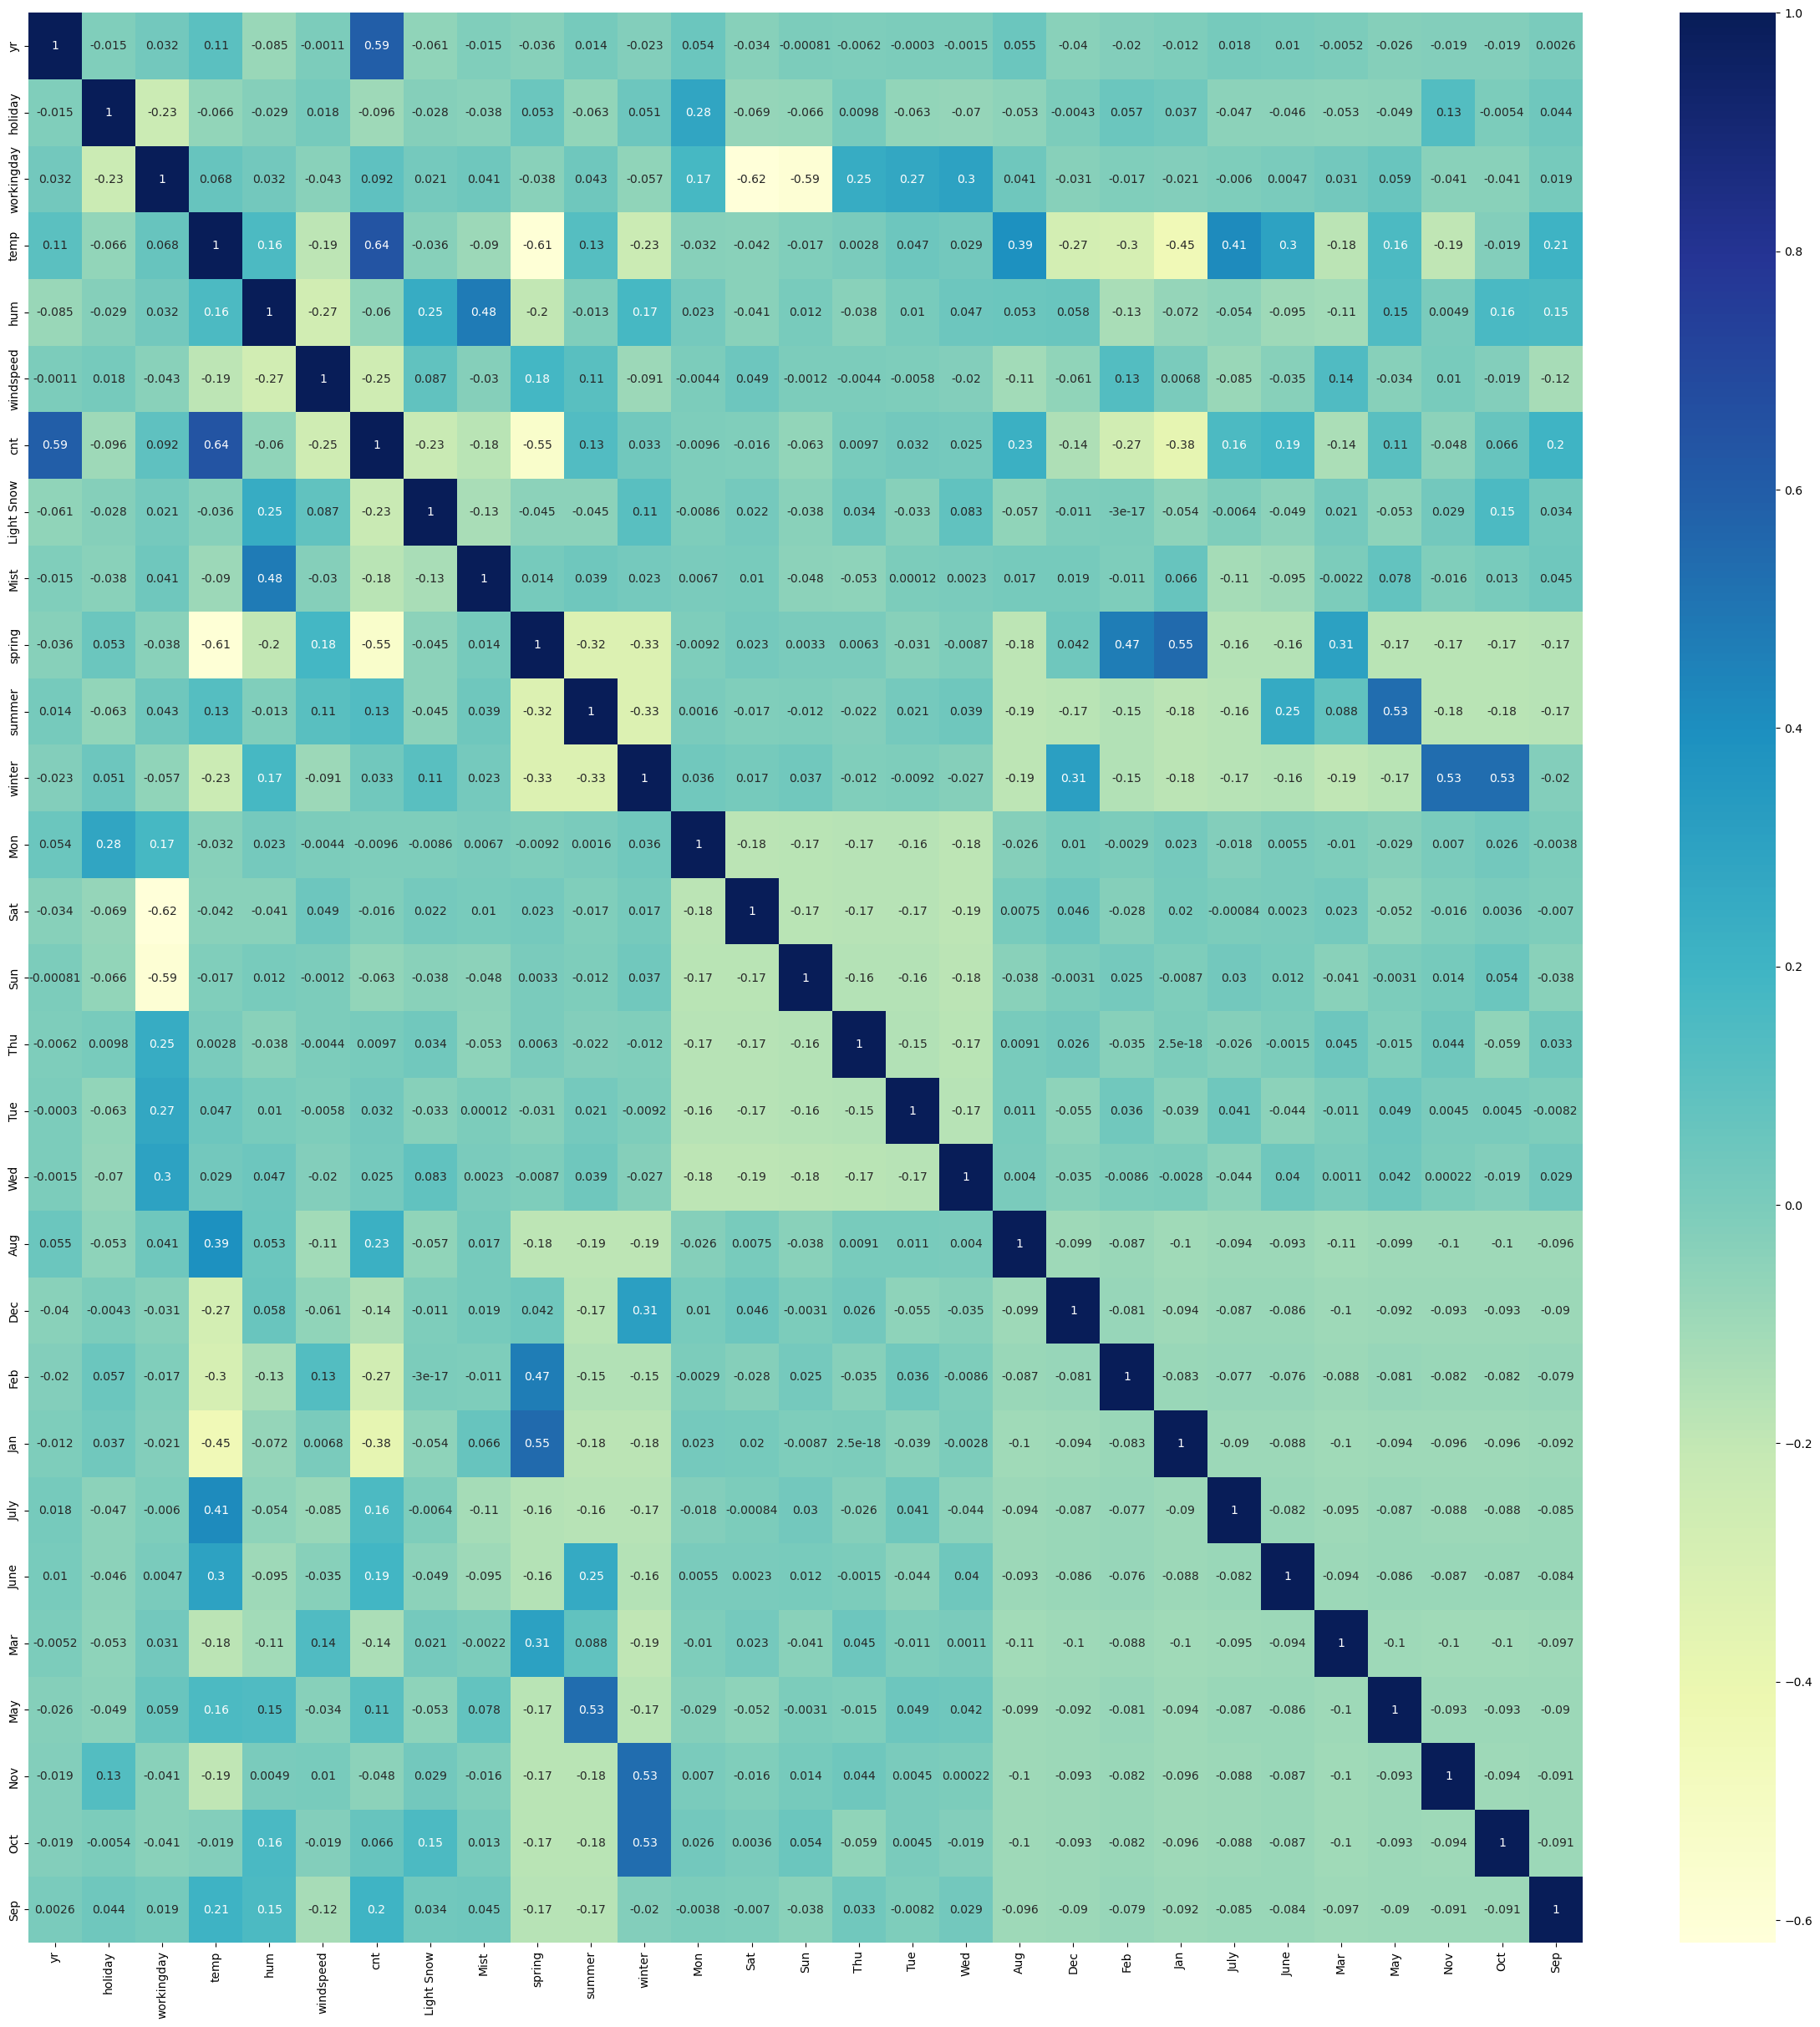

In [33]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most

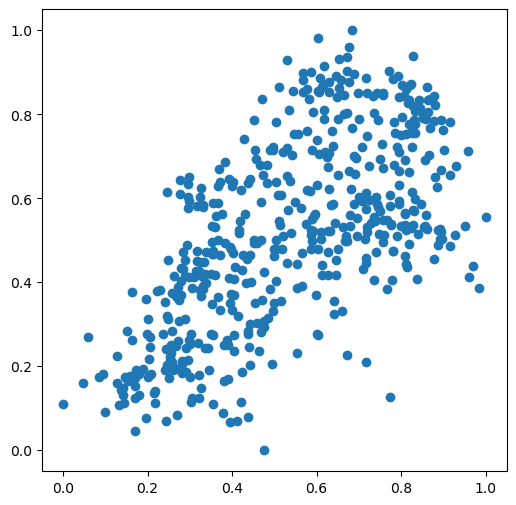

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [35]:
# Create Training Dataset
y_train = df_train['cnt']
X_train = df_train.loc[:, df_bikes.columns != 'cnt']

In [36]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [37]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(df_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         1.387779e-16
yr            3.053113e-16
holiday      -1.113692e-15
workingday    1.665335e-16
temp          4.024558e-16
hum          -6.938894e-16
windspeed     8.326673e-16
cnt           1.000000e+00
Light Snow    7.216450e-16
Mist          9.887924e-17
spring        9.020562e-16
summer       -3.330669e-16
winter        2.151057e-16
Mon           1.002670e-15
Sat           3.642919e-16
Sun           5.828671e-16
Thu           5.273559e-16
Tue           6.349088e-16
Wed           3.816392e-16
Aug          -8.326673e-17
Dec           1.665335e-16
Feb          -4.024558e-16
Jan          -3.920475e-16
July         -4.163336e-16
June          2.844947e-16
Mar          -3.885781e-16
May           2.636780e-16
Nov          -2.914335e-16
Oct          -3.573530e-16
Sep          -2.359224e-16
dtype: float64

In [38]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.25744279 -0.0610664  -0.04815901  0.03872462  0.10584692 -0.02090673
  0.03511753 -0.01941807 -0.00923674 -0.01888985 -0.00538751  0.01440398
 -0.0455859  -0.03228181 -0.06277659 -0.04035007 -0.00297239  0.00104515
  0.02393995 -0.04185131  0.00753359  0.0810599 ]
0.3063556304566333


In [40]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.726e+29
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:15:43   Log-Likelihood:                 16827.
No. Observations:                 510   AIC:                        -3.360e+04
Df Residuals:                     481   BIC:                        -3.347e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-16   4.88e-16      0.284      0.776   -8.21e-16     1.1e-15
yr          3.053e-16   1.76e-16      1.739      0.083   -3.96e-17     6.5e-16
holiday    -1.114e-15   3.17e-16     -3.512      0.000   -1.74e-15   -4.91e-16
workingday  1.665e-16   1.72e-16      0.968      0.334   -1.72e-16    5.05e-16
temp        4.025e-16   6.69e-16      0.602      0.548   -9.12e-16    1.72e-15
hum        -6.939e-16   5.16e-16     -1.344      0.180   -1.71e-15    3.21e-16
windspeed   8.327e-16   3.57e-16      2.330      0.020     1.3e-16    1.53e-15
cnt            1.0000   6.02e-16   1.66e+15      0.000       1.000       1.000
Light Snow  7.216e-16   3.81e-16      1.896      0.059   -2.64e-17    1.47e-15
Mist        9.888e-17   1.43e-16      0.693      0.488   -1.81e-16    3.79e-16
spring      9.021e-16   3.97e-16      2.273      0.023    1.22e-16    1.68e-15
summer     -3.331e-16   3.47e-16     -0.960      0.337   -1.01e-15    3.48e-16
winter      2.151e-16   3.74e-16      0.575      0.565    -5.2e-16     9.5e-16
Mon         1.003e-15   2.03e-16      4.949      0.000    6.05e-16     1.4e-15
Sat         3.643e-16    1.9e-16      1.915      0.056   -9.41e-18    7.38e-16
Sun         5.829e-16   1.86e-16      3.140      0.002    2.18e-16    9.48e-16
Thu         5.274e-16   2.05e-16      2.573      0.010    1.25e-16     9.3e-16
Tue         6.349e-16   2.05e-16      3.098      0.002    2.32e-16    1.04e-15
Wed         3.816e-16   1.97e-16      1.940      0.053   -4.87e-18    7.68e-16
Aug        -8.327e-17   4.45e-16     -0.187      0.852   -9.57e-16    7.91e-16
Dec         1.665e-16   4.44e-16      0.375      0.708   -7.07e-16    1.04e-15
Feb        -4.025e-16   4.35e-16     -0.926      0.355   -1.26e-15    4.52e-16
Jan         -3.92e-16   4.44e-16     -0.882      0.378   -1.27e-15    4.81e-16
July       -4.163e-16   4.64e-16     -0.898      0.370   -1.33e-15    4.95e-16
June        2.845e-16   3.31e-16      0.859      0.391   -3.66e-16    9.35e-16
Mar        -3.886e-16   3.24e-16     -1.200      0.231   -1.03e-15    2.48e-16
May         2.637e-16   2.78e-16      0.949      0.343   -2.82e-16    8.09e-16
Nov        -2.914e-16   4.81e-16     -0.606      0.545   -1.24e-15    6.53e-16
Oct        -3.574e-16   4.73e-16     -0.756      0.450   -1.29e-15    5.71e-16
Sep        -2.359e-16   4.25e-16     -0.555      0.579   -1.07e-15       6e-16
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.643
Skew:                          -0.078   Prob(JB):                        0.725
Kurtosis:                       3.076   Cond. No.                     1.30e+16
==============================================================================

N

In [41]:
X_train.shape

(510, 28)

#### Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [42]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Make sure to import LinearRegression if you haven't already

# Create a LinearRegression model
lm = LinearRegression()

# Initialize RFE with 15 features
rfe1 = RFE(lm, step = 30)

# Fit RFE with 15 features to your training data
rfe1.fit(X_train, y_train)

# Print the boolean results (selected features and their rankings)
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))



[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1)]

#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [43]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,Mist,spring,winter,Dec,Jan,July,Nov,Sep
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0


In [44]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          7.80e-189
Time:                        21:15:43   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3665      0.032     11.546      0.0

In [45]:
# Drop holiday column since the P value is more than 0.05
X_train_rfe2 = X_train_rfe1.drop('Dec',axis=1)
X_train_rfe2.columns

X_train_rfe2 = sm.add_constant(X_train_rfe2)

lm = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.67e-188
Time:                        21:15:43   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3532      0.032     11.203      0.0

In [46]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Make sure to import LinearRegression if you haven't already

# Create a LinearRegression model
lm = LinearRegression()

# Initialize RFE with 15 features
num_features = 15
rfe2 = RFE(lm, step = 15)

# Fit RFE with 15 features to your training data
rfe2.fit(X_train, y_train)

# Print the boolean results (selected features and their rankings)
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1)]

In [47]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
rfe2 = X_train[col1]

# Add a constant to the model
rfe2 = sm.add_constant(rfe2)
rfe2.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,Mist,spring,winter,Dec,Jan,July,Nov,Sep
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,1,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0


In [48]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          7.80e-189
Time:                        21:15:44   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3665      0.032     11.546      0.0

In [49]:
b=rfe2.drop('const',axis=1)

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.83
4,windspeed,4.07
8,winter,2.97
7,spring,2.94
6,Mist,2.26
0,yr,2.07
12,Nov,1.82
10,Jan,1.74
9,Dec,1.54


In [51]:
# Let's drop the 'hum' column
rfe2.drop("hum",axis=1,inplace=True)
rfe2

,const,yr,holiday,temp,windspeed,Light Snow,Mist,spring,winter,Dec,Jan,July,Nov,Sep
653,1.0,1,0,0.509887,0.300794,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,1,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,1,0,0,0,0


In [52]:
rfe3 = sm.add_constant(rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.08e-186
Time:                        21:15:44   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

In [53]:
c=rfe3.drop('const',axis=1)

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
7,winter,2.54
6,spring,2.36
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
5,Mist,1.53
8,Dec,1.46
10,July,1.36


In [55]:
rfe4 = sm.add_constant(rfe3)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.08e-186
Time:                        21:15:44   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

In [56]:
d=rfe4.drop('const',axis=1)

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = d.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
7,winter,2.54
6,spring,2.36
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
5,Mist,1.53
8,Dec,1.46
10,July,1.36


In [58]:
y_train_cnt = lm3.predict(rfe4)
res = (y_train - y_train_cnt)

Text(0.5, 0, 'Errors')

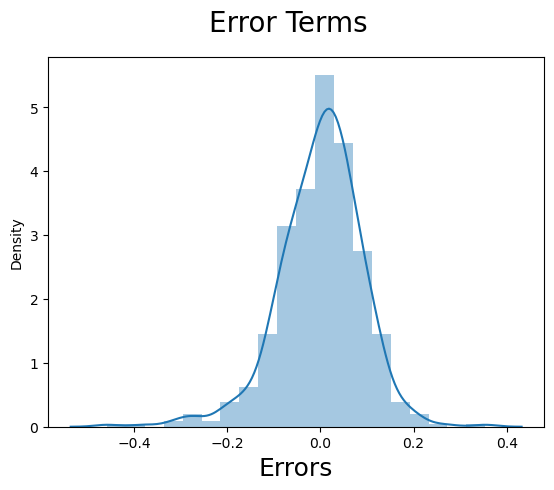

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

### Making Predictions

We would first need to scale the test set as well. So let's start with that.

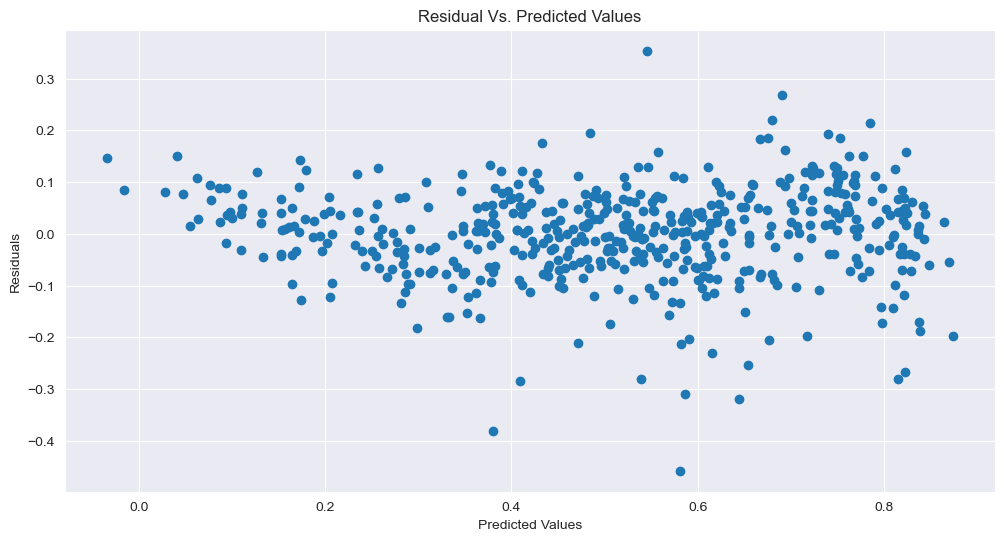

In [60]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_cnt,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [61]:
rfe4.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Light Snow', 'Mist',
       'spring', 'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [62]:
# let's recall the set of variables which are to be scaled
var


['temp', 'hum', 'windspeed', 'cnt']

In [63]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Light Snow', 'Mist', 'spring', 'summer', 'winter', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [64]:
df_test_pred[var] = scaler.transform(df_test_pred[var])

In [65]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test_pred['cnt']
X_test = df_test_pred.loc[:, df_bikes.columns != 'cnt']

In [66]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Light Snow,Mist,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [67]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=d.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'Light Snow', 'Mist', 'spring',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [68]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe_pred = X_test[col2]

In [69]:
X_test_rfe_pred

,yr,holiday,temp,windspeed,Light Snow,Mist,spring,winter,Dec,Jan,July,Nov,Sep
184,0,1,0.831783,0.084219,0,1,0,0,0,0,1,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0,0,0,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.257562,0.287411,0,1,1,0,0,0,0,0,0
702,1,0,0.519232,0.283397,0,0,0,1,1,0,0,0,0
127,0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,0
640,1,0,0.745598,0.052115,0,1,0,1,0,0,0,0,0


In [70]:
# Add a constant to the test set created
X_test_rfe_pred = sm.add_constant(X_test_rfe_pred)
X_test_rfe_pred

,const,yr,holiday,temp,windspeed,Light Snow,Mist,spring,winter,Dec,Jan,July,Nov,Sep
184,1.0,0,1,0.831783,0.084219,0,1,0,0,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0,0,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.287411,0,1,1,0,0,0,0,0,0
702,1.0,1,0,0.519232,0.283397,0,0,0,1,1,0,0,0,0
127,1.0,0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,0
640,1.0,1,0,0.745598,0.052115,0,1,0,1,0,0,0,0,0


In [71]:
# Making predictions
y_pred = lm3.predict(X_test_rfe_pred)

Text(0, 0.5, 'y_pred')

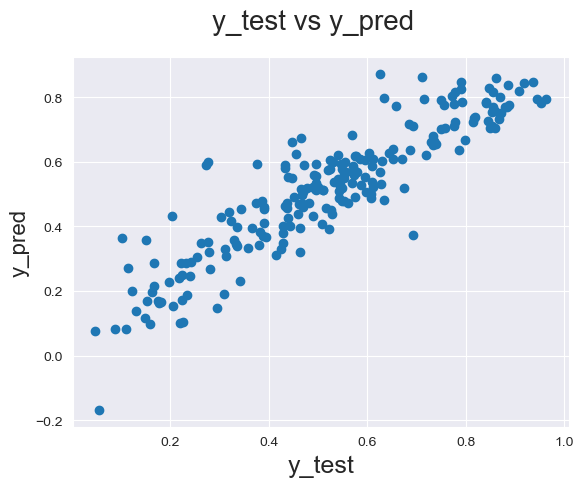

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

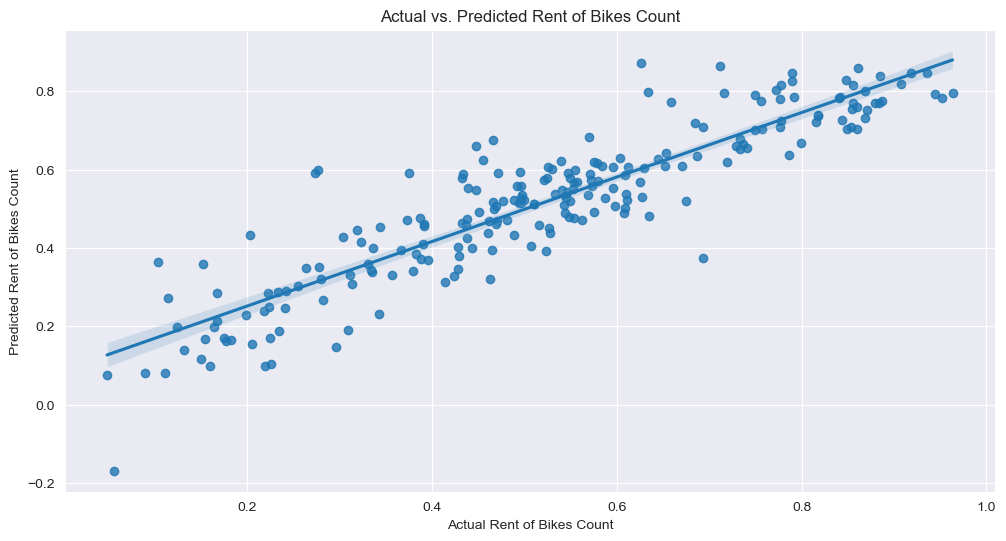

In [73]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [74]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.8161282341346277

In [75]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_pred)

0.8161282341346277

In [76]:
y_pred.head()

184    0.374405
535    0.863316
299    0.427751
221    0.591957
152    0.535569
dtype: float64

In [77]:
Cofficients = round(lm3.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.40
const         0.29
yr            0.23
winter        0.06
Sep           0.05
Dec          -0.05
Nov          -0.05
Jan          -0.06
July         -0.06
Mist         -0.08
holiday      -0.09
spring       -0.10
windspeed    -0.15
Light Snow   -0.29
dtype: float64

In [78]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.4 * temp + 0.29 * const + 0.23 * yr + 0.06 * winter + 0.05 * Sep + -0.05 * Dec + -0.05 * Nov + -0.06 * Jan + -0.06 * July + -0.08 * Mist + -0.09 * holiday + -0.1 * spring + -0.15 * windspeed + -0.29 * Light Snow + 

<B>Best Fit Line Equation:</B>
    
<B>0.4 * temp + 0.29 * const + 0.23 * yr + 0.06 * winter + 0.05 * Sep + -0.05 * Dec + -0.05 * Nov + -0.06 * Jan + -0.06 * July + -0.08 * Mist + -0.09 * holiday + -0.1 * spring + -0.15 * windspeed + -0.29 * Light Snow + 
<B>Best Fit Line Equation:</B>

### Final Assessment:

 1. Temperature has the more significant impact on the business
    
 2. Weather conditions like Humidity, WindSpeed amd Light Snow has negative impact on the demand on Bikes.
    
 3. Fall and Winter is when demand for the Bikes are higher especially the month of September whereas it is lowest in the  month of January
    
 4. Holidays have a negative impact on the demand of Boom Bikes
    
 5. Rather than weekends the demands is higher over the weekdays
    
 6. Boom Bikes can expect 35% growth year on year